In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
np.set_printoptions(suppress=True)

digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

Removing mean and scaling variance
===================================

In [2]:
from sklearn.preprocessing import StandardScaler

1) Instantiate the model

In [3]:
scaler = StandardScaler()

2) Fit using only the data.

In [4]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

3) `transform` the data (not `predict`).

In [5]:
X_train_scaled = scaler.transform(X_train)

In [6]:
X_train.shape

(1347, 64)

In [7]:
X_train_scaled.shape

(1347, 64)

The transformed version of the data has the mean removed:

In [8]:
X_train_scaled.mean(axis=0)

array([ 0.,  0.,  0., -0., -0., -0.,  0., -0., -0., -0., -0.,  0.,  0.,
        0., -0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0., -0., -0.,  0.,
       -0., -0., -0.,  0., -0., -0.,  0., -0.,  0., -0.,  0.,  0., -0.,
        0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.,
        0.,  0., -0., -0., -0.,  0., -0., -0.,  0., -0., -0., -0.])

In [9]:
X_train_scaled.std(axis=0)

array([ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [10]:
X_test_transformed = scaler.transform(X_test)

In [11]:
X_test_transformed.mean(axis=0)

array([ 0.        , -0.03104149, -0.00380271,  0.07807546,  0.00653808,
       -0.02913363, -0.05001752, -0.04204737, -0.06827569, -0.07187472,
       -0.0054518 , -0.04317721, -0.04659136,  0.01991858, -0.05286634,
       -0.03932554, -0.05156009, -0.10362538,  0.00553774, -0.02951387,
        0.06977617,  0.00293448, -0.05366347, -0.07757306, -0.03856149,
        0.01017247, -0.03820782,  0.02714545,  0.05734698, -0.00960392,
       -0.03912289, -0.05457478,  0.        , -0.05128726, -0.07117637,
       -0.10535284, -0.07078701, -0.04366022, -0.0152575 ,  0.        ,
        0.02363541, -0.05169787, -0.07551444, -0.06979481,  0.06100392,
       -0.0111435 , -0.02695468, -0.03822599, -0.02854818, -0.01333821,
       -0.00059275,  0.03764347,  0.01160077, -0.00311801, -0.00440032,
       -0.00560812, -0.02725696, -0.02381635, -0.00226142,  0.06257934,
        0.00114055,  0.00360451,  0.0053882 ,  0.07677096])

In [12]:
scaler.inverse_transform(X_test_transformed)

array([[  0.,   0.,   8., ...,   0.,   0.,   0.],
       [  0.,   0.,   2., ...,  16.,  10.,   0.],
       [  0.,   0.,   1., ...,   0.,   0.,   0.],
       ..., 
       [  0.,   0.,   5., ...,   1.,   0.,   0.],
       [  0.,   0.,   1., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

Principal Component Analysis
=============================

0) Import the model

In [13]:
from sklearn.decomposition import PCA

1) Instantiate the model

In [16]:
pca = PCA(n_components=2)

2) Fit to training data

In [17]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

3) Transform to lower-dimensional representation

In [18]:
print(X.shape)
X_pca = pca.transform(X)
X_pca.shape

(1797, 64)


(1797, 2)

Visualize
----------

<IPython.core.display.Javascript object>


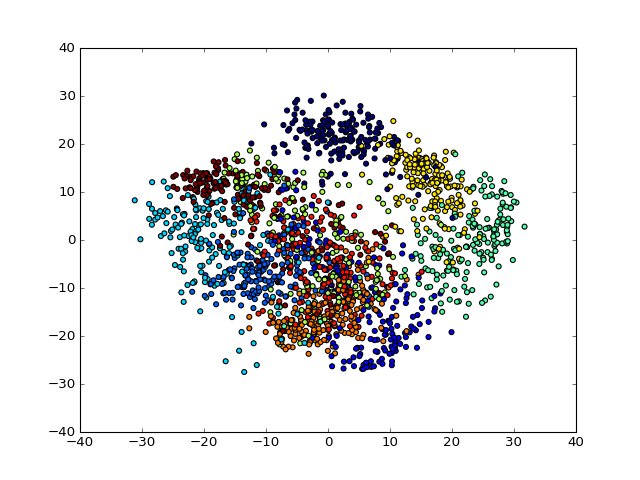

In [21]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y);

Manifold Learning
==================

In [22]:
from sklearn.manifold import Isomap
isomap = Isomap()

In [23]:
X_isomap = isomap.fit_transform(X)

<IPython.core.display.Javascript object>


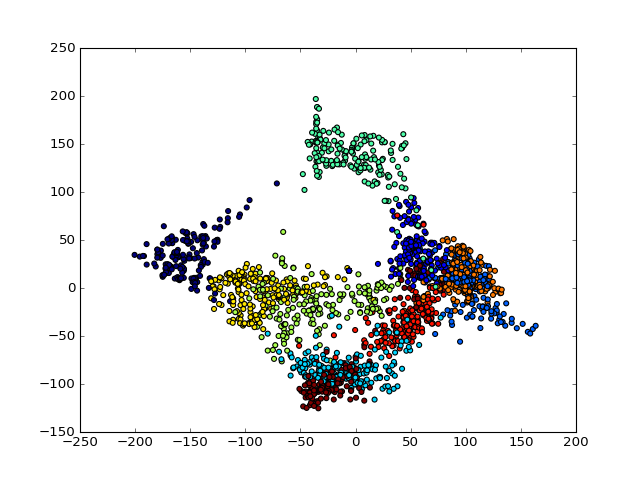

In [25]:
plt.figure()
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y);

# Exercises
Visualize the digits dataset using the TSNE algorithm from the sklearn.manifold module (it runs for a couple of seconds).


In [26]:
from sklearn.manifold import TSNE
tsne = TSNE()

<IPython.core.display.Javascript object>


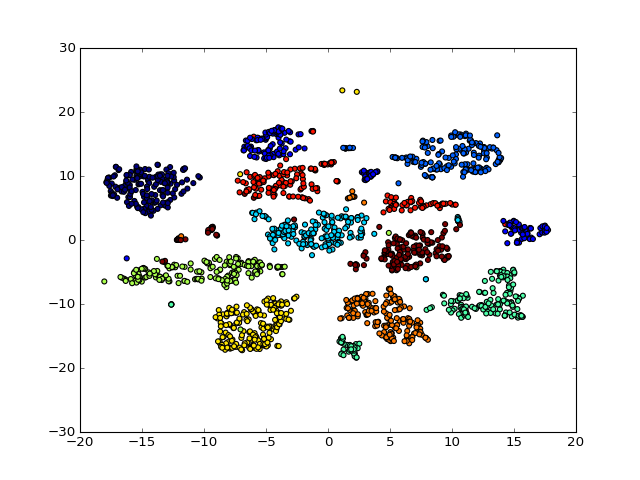

In [27]:
X_tsnemap = tsne.fit_transform(X)
plt.figure()
plt.scatter(X_tsnemap[:, 0], X_tsnemap[:, 1], c=y);

In [ ]:
# %load solutions/digits_tsne.py